# Tarea 3
*Adriana Velasquez*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**c) Defina una discretización para el dominio con N = 1000 puntos con −5 ≤ x ≤ 5**

In [27]:
x = np.linspace(-5, 5, 1000)
print(x)

[-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991 -4.8998999  -4.88988989
 -4.87987988 -4.86986987 -4.85985986 -4.84984985 -4.83983984 -4.82982983
 -4.81981982 -4.80980981 -4.7997998  -4.78978979 -4.77977978 -4.76976977
 -4.75975976 -4.74974975 -4.73973974 -4.72972973 -4.71971972 -4.70970971
 -4.6996997  -4.68968969 -4.67967968 -4.66966967 -4.65965966 -4.64964965
 -4.63963964 -4.62962963 -4.61961962 -4.60960961 -4.5995996  -4.58958959
 -4.57957958 -4.56956957 -4.55955956 -4.54954955 -4.53953954 -4.52952953
 -4.51951952 -4.50950951 -4.4994995  -4.48948949 -4.47947948 -4.46946947
 -4.45945946 -4.44944945 -4.43943944 -4.42942943 -4.41941942 -4.40940941
 -4.3993994  -4.38938939 -4.37937938 -4.36936937 -4.35935936 -4.34934935
 -4.33933934 -4.32932933 -4.31931932 -4.30930931 -4.2992993  -4.28928929
 -4.27927928 -4.26926927 -4.25925926 -4.24924925 -4.23923924 -4.22922923
 -4.21921922 -4.20920921 -4.1991992  -4.18918919 -4

**d) Defina una función que calcule el potencial para cada punto xi de la discretización**

In [3]:
def v(x):
    v = 0.5*x**2
    return v 

In [4]:
#Los parametros son x, la energía E y una función para el potenical f.

def R(x, E, f):
    return 2*(f(x)-E)
    

**e) Defina una función (m´etodo de Numerov) que tenga como parámetros la discretización y un valor
de energía específico. Esta función integra la ecuación diferencial en el dominio para una energía
E específica.**

In [5]:
def normalize_psi(psi, x):
    dx = x[1] - x[0]
    norm_constant = np.sqrt(np.sum(np.abs(psi)**2) * dx)
    normalized_psi = psi / norm_constant
    
    return normalized_psi

In [37]:
N = 1000
hval = (x[-1] - x[0]) / (N - 1)

def numerov(x, E, f, h = hval):
    psi = np.zeros(N)
    psi[0] = 0
    psi[1] = 1*10**-5
    for i in range(2, N):
        num = 2*(1+(R(x[i-1], E, f)*5*h**2)/12)*psi[i-1] - (1-(R(x[i-2], E, f)*h**2)/12)*psi[i-2]
        den = (1-(R(x[i], E, f)*h**2)/12)
        psi[i] = num/den
    
    #Si se utiliza la linea return psi/mas(psi) el resultado da como le da al profesor, por esa razón dejaré esa linea de codigo a la vista. No obstante yo normalize las curvas
    # por medio de la función normalize_psi. De ser necesario, retire el # de la última linea para observar la función normalizada como debe ser.
    return psi/max(psi)
    #return normalize_psi(psi, x)

**f) Los valores propios del operador se calculan con el último valor de la función de onda. Para satisfacer la condición de frontera, el valor propio de energía se estima cuando
el último valor de la función de onda cambia de signo.**

In [38]:
#   Esta función recibe como parametro una energía E de prueba arbitraria y calcula el valor propio para la función
#   más cercano, iterando para cada dE hasta que se cumpla la condición.
def eigen(E, f):
    dE = 0.001
    P1 = numerov(x, E, f)[N-1]
    E = E + dE
    while abs(dE) > 1*10**(-7):
        P2 = numerov(x, E, f)[N-1]
        if P1*P2 < 0:
            dE = -dE/2
        E = E +dE
        P1 = P2
    return E

**g) Con la condiciones dadas, encuentre el espectro del operador para los primeros seis niveles de
energía.**

In [39]:
#De nuevo, como se observa el parametro E es totalmente arbitrario.
#Se utilizan valores arbitrarios cada vez más grandes hasta conseguir los 6 primeros.
print(eigen(0.3, v))
print(eigen(0.6, v))
print(eigen(2.4, v))
print(eigen(3.3, v))
print(eigen(4.3, v))
print(eigen(5.3, v))


0.5000000610351563
1.5000000610351016
2.500000061035144
3.5000011596679457
4.500012634277412
5.500098693847725


**(h) Para los valores propios encontrados dibuje los estados propios del operador:**

Para esta parte utilizé la gráfica con el código que es equivalente al resultado de la guía, si desea observar el resultado del codigo de la función numerov para la función normalizada retire el comentario de return normalize_psi(psi, x) y comente el  return psi/max(psi)

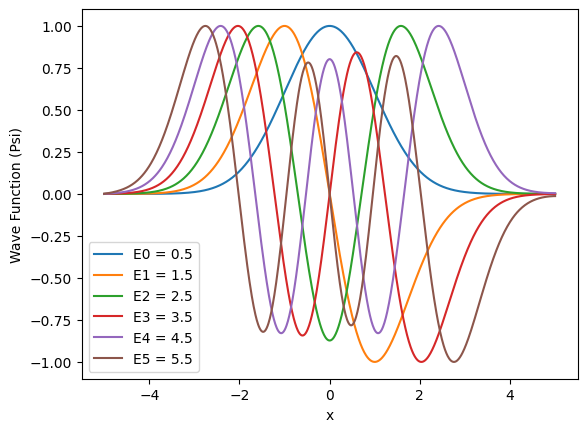

In [40]:

energies = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
numerov_solutions = [numerov(x, E, v) for E in energies]


for i, E in enumerate(energies):
    label = f'E{i} = {E}'
    plt.plot(x, numerov_solutions[i], label=label)

plt.legend()

plt.xlabel('x')
plt.ylabel('Wave Function (Psi)')


plt.show()


i) **Potencial Gausiano: con lo aprendido anteriormente, encuentre los primeros cinco estados
ligados (En < 0) y los estados propios del operador de energ´ıa usando el potencial:**


In [41]:
def v1(x):
    return -10*np.exp((-x**2)/20)


Estados ligados. Se utilizan 5 energías de prueba diferentes TOTALMENTE ARBITRARIOS. Cada una mayor que la anterior. Además los resultados no estan redondeados, pero si se realiza un redondeo para 2 decimales con round la respuesta queda igual a las energías esperadas.

In [31]:
a1 = eigen(-9.59, v1)
b1 = eigen(-8.59, v1)
c1 = eigen(-7.70, v1)
d1 = eigen(-6.80, v1)
e1 = eigen(-6.00, v1)
gaussianvalues = [a1, b1, c1, d1, e1]
print(gaussianvalues)



[-9.509393615722704, -8.547380187988308, -7.624262634277317, -6.741047058105447, -5.898416442871058]


estados propios

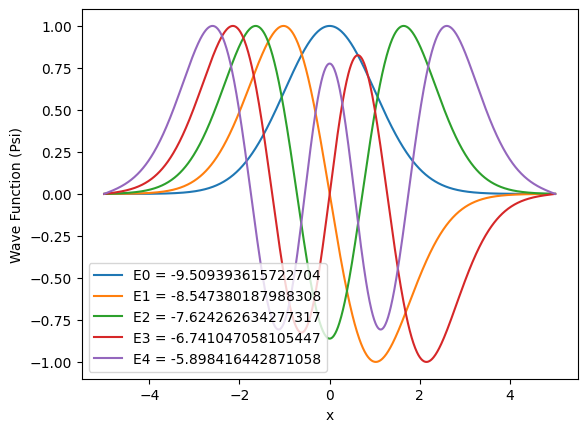

In [42]:
numerov_solutions2 = [numerov(x, E, v1) for E in gaussianvalues ]


for i, E in enumerate(gaussianvalues):
    label = f'E{i} = {E}'
    plt.plot(x, numerov_solutions2[i], label=label)

plt.legend()

plt.xlabel('x')
plt.ylabel('Wave Function (Psi)')


plt.show()

Potencial racional: encuentre los dos estados ligados (En < 0) y los estados propios del operador
de energ´ıa usando el potencial:

In [12]:
def v2(x):
    return -4/((1+x**2)**2)

Estados Ligados.

In [25]:
print(eigen(-3, v2))
print(eigen(-2.3, v2))

rationaleigen= [eigen(-3, v2),eigen(-2.3, v2)]

-2.4713450317383403
-0.4256228637696737


Estados propios

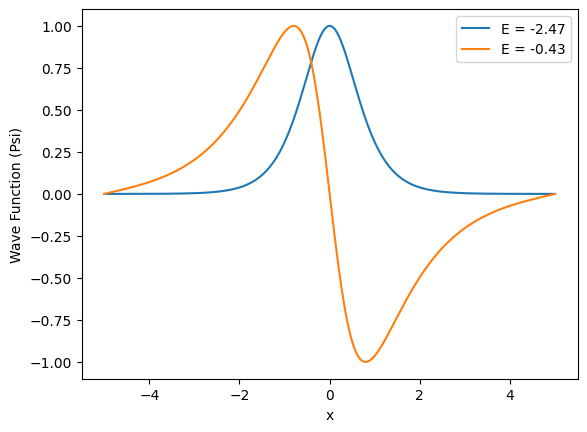

In [43]:
plt.plot(x, numerov(x, rationaleigen[0], v2), label = 'E = -2.47')
plt.plot(x, numerov(x, rationaleigen[1], v2), label = 'E = -0.43')
plt.xlabel('x')
plt.ylabel('Wave Function (Psi)')
plt.legend()